Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [26]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

Index([u'age', u'sex', u'wtyrago', u'finalwt', u'wtkg2', u'htm3'], dtype='object')


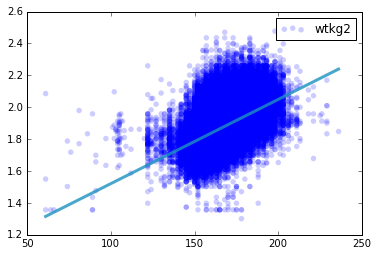

In [5]:
import nsfg
import brfss
import thinkplot 
import numpy as np
import pandas as pd
import thinkstats2
import math
%matplotlib inline
data = brfss.ReadBrfss()
print data.columns
data = data.dropna(subset = ['htm3','wtkg2'])
dw = np.log10(data.wtkg2)
dh = data.htm3
dw.describe()
dh.describe()
inter, slope = thinkstats2.LeastSquares(dh,dw)
fit_xs,fit_ys = thinkstats2.FitLine(dh,inter,slope)


thinkplot.Scatter(dh,dw,alpha = 0.2)
thinkplot.Plot(fit_xs,fit_ys)
thinkplot.Show()


<p>
    From the scatter plot above we can see that the log transformed data with the line of best fit has a positive linear correlation. By log transfomring weight we are able to create a linear relationship between log(weight) and height, we can take the exponential of the variable for our predictor variable: height. This is the difference in the expected geometric means of the log of weight between the any divisions we can do in height. So we can compare it between divisions in height to see what is the best split by comparing the geometric means of each.
</p>

Percentiles of Weight vs Height
Root Mean Squared of Residuals 
0.0874077708042


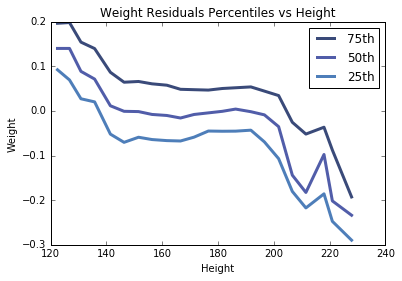

In [6]:
residuals = thinkstats2.Residuals(dh,dw,inter, slope)
data['residual'] = residuals

bins = np.arange(120,250,5)
indices = np.digitize(dh,bins)
groups = data.groupby(indices)

heights = [group.htm3.mean() for i, group in groups][1:-1]
pregs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]
print "Percentiles of Weight vs Height"
for percent in [75,50,25]:
    wgt_prcnt = [cdf.Percentile(percent) for cdf in pregs]
    label = '%dth' %percent
    thinkplot.Plot(heights, wgt_prcnt, label = label)
thinkplot.Config(title = "Weight Residuals Percentiles vs Height", xlabel= "Height",ylabel="Weight",legend = "true")

#using residuals we can calculate MSE
MSE = sum(residuals**2)/len(residuals)
print "Root Mean Squared of Residuals "
print math.sqrt(MSE)

<p>
    From the residuals plot we can see that most of the data follows a similar trend throughout the percentiles. Height is a variable using our RMSE value of: 0.0874 is quite small and there is not a lot of variance between the models. (this is using log however). Height has a definite relationship and is a fairly good variable to predict weight with.
    Next we can test the confidence intervals of our fit(was unsuccessful)
</p>

In [59]:
# adapted from Allen's SamplingDistributions method from thinkstats2 

def SamplingDistributions(live,iters = 101):
    t = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(live)
        weights = sample.wtkg2
        heights = sample.htm3
        estimates = thinkstats2.LeastSquares(heights, weights)
        t.append(estimates)
    inters, slopes = zip(*t)
    return inters,slopes

#using =Allen's PlotConfidenceIntervals method from thinkstats2 
def PlotConfidenceIntervals(xs,inters,slopes,percent = 90, **options):
    fys_seq = []
    for inter, slope in zip(inters,slopes):
        fxs, fys = thinkstats2.FitLine(xs,inter,slope)
        fys_seq.append(fys)
    p = (100 - percent)/2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)
    
inter_set, slope_set = SamplingDistributions(data)
    
PlotConfidenceIntervals(dw,inter_set,slope_set)

AttributeError: 'module' object has no attribute 'Summarize'

In [60]:
#calculate R-squared 
def CoefDetermination(ys,res):
    return 1 - Var(res)/Var(ys)

CoefDetermination(fit_ys,dw)

NameError: global name 'Var' is not defined

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.